# Plot: optimal distance for forecasting the Lorenz system
as a function of catalog size.

This notebook accompanies the following publication:
Paul Platzer, Arthur Avenas, Bertrand Chapron, Lucas Drumetz, Alexis Mouche, Léo Vinour. Distance Learning for Analog Methods. 2024. [⟨hal-04841334⟩](https://hal.science/hal-04841334)

It is used to plot optimized distance from numerical experiments with Lorenz system data (the results of "Notebook4"). 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# settings for plots
cols = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']
matplotlib.rcParams.update({'font.size': 14})

In [3]:
data_folder = '../../data/lorenz/'
output_folder = '../../output/lorenz/'

# Load optimization results

In [8]:
npzfile = np.load(output_folder + 'optim_lorenz_catsize.npz')

transform_optim = npzfile['transform_optim']
mse_optim = npzfile['mse_optim']
k = npzfile['k']
learning_rate_factor = npzfile['learning_rate_factor']
regul = npzfile['regul']
n_iter = npzfile['n_iter']
Ncats = np.round( 10**7 / 10**np.linspace(4,1.5,25) ).astype(int)
Nperm = transform_optim.shape[1]

In [5]:
transform_optim[transform_optim == 0] = np.nan
transform_optim[np.abs(transform_optim) > 1e15] = np.nan
transform_optim[np.abs(transform_optim) < 1e-15] = np.nan

mse_optim[mse_optim == 0] = np.nan
mse_optim[np.abs(mse_optim) > 1e15] = np.nan
mse_optim[np.abs(mse_optim) < 1e-15] = np.nan

# Plot figure 4

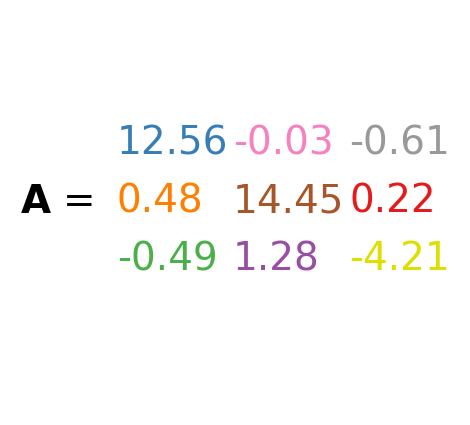

In [6]:
l = 0
plt.figure(figsize=(2.5,2.5), dpi=200)
plt.text( 0 , .5 , r'$\mathbf{A}$ =')
for i in range(3):
    for j in range(3):
        plt.text( .55+(i-1)*.3 , .5-(j-1)*.15 , str(
            np.round(transform_optim[l,0,i,j],2)),
                color=cols[np.ravel_multi_index((i,j), dims=(3,3))])
plt.axis('off')
plt.show()

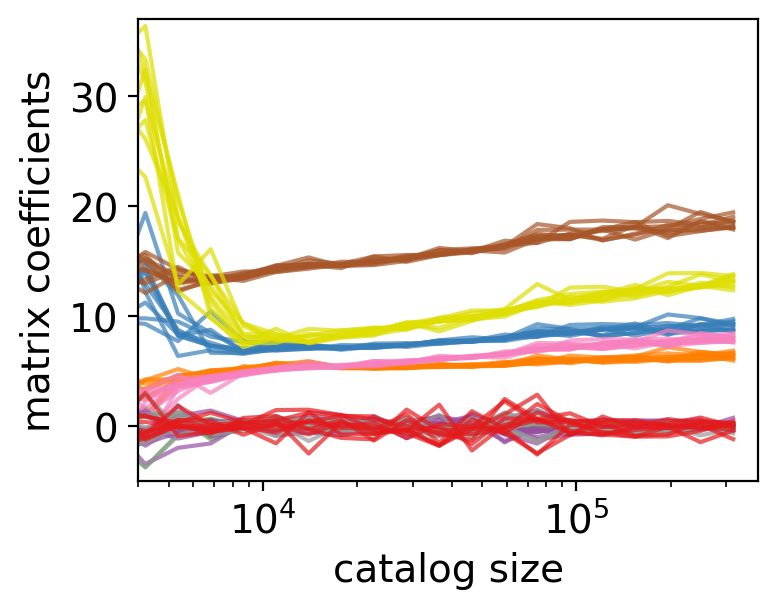

In [9]:
plt.figure(figsize=(4,3), dpi=200)
for i in range(3):
    for j in range(3):
        for j_perm in range(Nperm):
            plt.plot(Ncats, transform_optim[:,j_perm,i,j],
                    color=cols[np.ravel_multi_index((i,j), dims=(3,3))], alpha=.7)
plt.plot( [Ncats[l]]*2 , [-5,100] , '--' , color='grey' )
plt.xlim([4e3,3.8e5]); plt.ylim([-5,37])
plt.xscale('log'); 
plt.ylabel('matrix coefficients')# of $\mathbf{A}$')
plt.xlabel('catalog size')
plt.show()

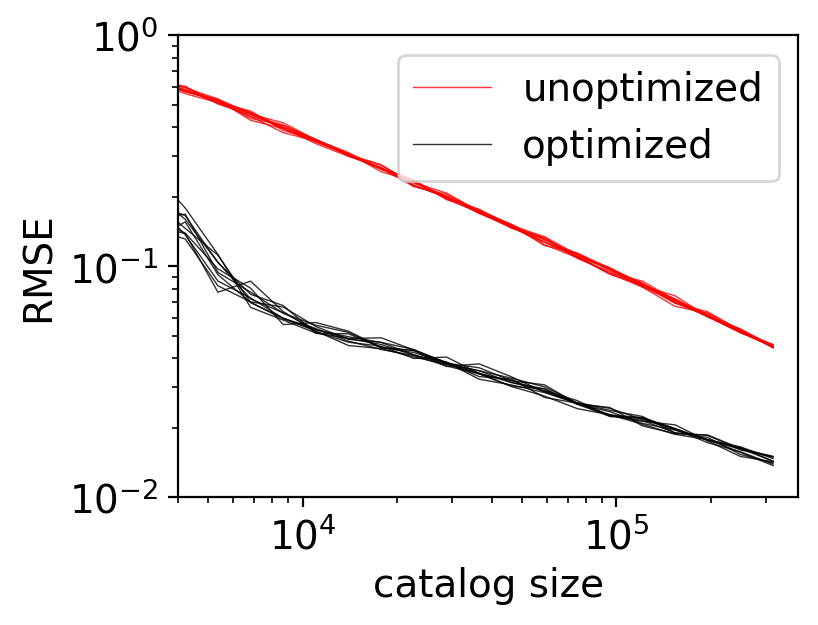

In [11]:
plt.figure(figsize=(4,3), dpi=200)
icatmax = 26
for jperm in range(Nperm):
    plt.plot(Ncats[:icatmax], np.sqrt(mse_optim[:icatmax,jperm,0]), '-',
             color='r', lw=.5, alpha=.8, label='unoptimized'*(jperm==0))
    plt.plot(Ncats[:icatmax], np.sqrt(mse_optim[:icatmax,jperm,-1]), '-',
             color='k', lw=.5, alpha=.8, label='optimized'*(jperm==0))
plt.plot( [Ncats[l]]*2 , [1e-3,1e1] , '--' , color='grey' )
plt.legend(loc='upper right')
plt.xscale('log'); plt.yscale('log')
plt.xlim([4e3,3.8e5]);
plt.ylim([1e-2,1])
plt.ylabel(r'$\sqrt{\sum_{i,j}\mathbf{A}_{ij}^2}$')
# plt.ylabel(r'norm of matrix $\mathbf{A}$')
plt.ylabel('RMSE')
plt.xlabel('catalog size')
plt.show()